## KNN Code Using Heart Disease Dataset

Heart Disease Dataset (Cleveland)
Overview
The Heart Disease dataset is a well-known medical dataset used to predict the presence or absence of heart disease based on patient data. It originates from the Cleveland Heart Disease study, and is often used for classification problems in machine learning.

Dataset Information
### Heart Disease Dataset (Cleveland) – Description

- **Total Instances:** ~303
- **Problem Type:** Classification
- **Goal:** Predict the presence of heart disease in a patient

###  Input Features (Independent Variables)

- `age`: Age of the patient
- `sex`: Sex (1 = male, 0 = female)
- `cp`: Chest pain type  
  - 0: Typical angina  
  - 1: Atypical angina  
  - 2: Non-anginal pain  
  - 3: Asymptomatic
- `trestbps`: Resting blood pressure (in mm Hg)
- `chol`: Serum cholesterol in mg/dl
- `fbs`: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- `restecg`: Resting electrocardiographic results (0, 1, 2)
- `thalach`: Maximum heart rate achieved
- `exang`: Exercise-induced angina (1 = yes, 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: Slope of the peak exercise ST segment (0, 1, 2)
- `ca`: Number of major vessels (0–3) colored by fluoroscopy
- `thal`: Thalassemia type  
  - 1: Normal  
  - 2: Fixed defect  
  - 3: Reversible defect

### Target Variable (Dependent Variable)

- `target`: Heart disease diagnosis  
  - 0: No heart disease  
  - 1: Heart disease present


Use Cases
Predicting patient risk levels

Feature importance analysis in healthcare

Benchmarking classification algorithms (KNN, Logistic Regression, etc.)

Teaching ML pipelines with real-world data

## KNN Multiclass Classification – Steps Before Each Code Block

### 1. Import Required Libraries
Import all necessary libraries such as pandas, NumPy, scikit-learn modules for preprocessing, model building, and evaluation.

### 2. Load the Dataset
Read the dataset (e.g., from a CSV file). Ensure the dataset has a target column representing the classes.

### 3. Explore the Dataset
Display basic info like the first few rows, check for missing values, and confirm the number of target classes.

### 4. Preprocess the Data
Separate features and target. Apply feature scaling to bring all variables to the same scale, which is important for distance-based algorithms like KNN.

### 5. Split the Dataset
Divide the data into training and test sets to evaluate model performance fairly.

### 6. Train the KNN Model
Initialize the KNN classifier and fit it to the training data.

### 7. Make Predictions
Use the trained model to predict the classes for the test set.

### 8. Evaluate the Model
Check model performance using metrics like confusion matrix, accuracy, and classification report.

### 9. Optional: Tune k Value
Test multiple values of ‘k’ using cross-validation to find the one that gives the best performance.


In [1]:
#Import Required Libraries¶
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv"

df = pd.read_csv(url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Scale features
print("After Scaling")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

After Scaling
[[ 1.61047991 -1.46385011  2.04442042 ...  0.94818498  1.20703366
  -0.56122273]
 [ 1.28205058  0.68313005  0.05747367 ... -0.6677359   2.16789598
  -2.21751422]
 [ 0.0778097  -1.46385011 -0.93599971 ... -0.6677359   0.24617134
   1.09506875]
 ...
 [-0.36009607 -1.46385011  1.05094704 ...  0.94818498 -0.71469098
  -0.56122273]
 [ 0.0778097   0.68313005  0.05747367 ...  0.94818498 -0.71469098
  -0.56122273]
 [ 1.0630977  -1.46385011 -0.93599971 ...  0.94818498 -0.71469098
  -0.56122273]]


In [10]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
# Predict
y_pred = knn.predict(X_test_scaled)

In [25]:
# Evaluate

cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Confusion Matrix:
 [[20  8]
 [ 3 30]]



---

### Metrics Breakdown

| Metric         | Class 0 (No Disease) | Class 1 (Disease) | Description |
|----------------|----------------------|-------------------|-------------|
| **Precision**  | 0.87                 | 0.79              | How many selected items are relevant? |
| **Recall**     | 0.71                 | 0.91              | How many relevant items are selected? |
| **F1-score**   | 0.78                 | 0.85              | Harmonic mean of Precision and Recall |
| **Support**    | 28                   | 33                | Number of actual instances of the class |

---

###  Overall Metrics

| Metric          | Value | Description |
|-----------------|--------|-------------|
| **Accuracy**    | 0.82   | Correct predictions out of total |
| **Macro Avg**   | 0.83 precision, 0.81 recall, 0.81 f1 | Treats all classes equally |
| **Weighted Avg**| 0.83 precision, 0.82 recall, 0.82 f1 | Weighs metrics by class support |

---

##  Confusion Matrix




|                | Predicted 0 (No Disease) | Predicted 1 (Disease) |
|----------------|--------------------------|------------------------|
| **Actual 0**   | 20 (True Negatives)      | 8 (False Positives)    |
| **Actual 1**   | 3 (False Negatives)      | 30 (True Positives)    |

---

### Interpretation

- **True Negatives (20)**: Model correctly predicted No Disease.
- **False Positives (8)**: Model incorrectly predicted Disease when it was No Disease.
- **False Negatives (3)**: Model missed Disease cases.
- **True Positives (30)**: Model correctly predicted Disease.

---

### Summary

- Model has **strong recall (0.91) for Disease**, meaning it’s good at identifying positives.
- **Lower recall (0.71) for No Disease** indicates more false positives.
- **Overall performance is balanced** with **accuracy at 82%** and **F1-scores above 0.78** for both classes.



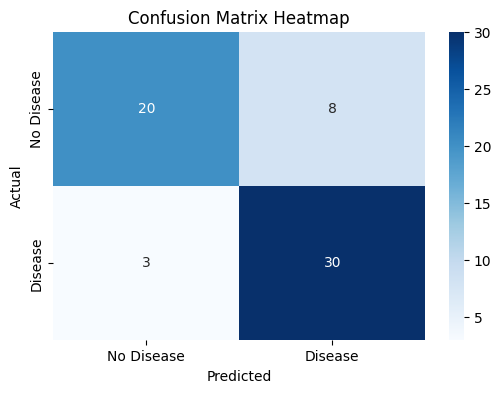

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

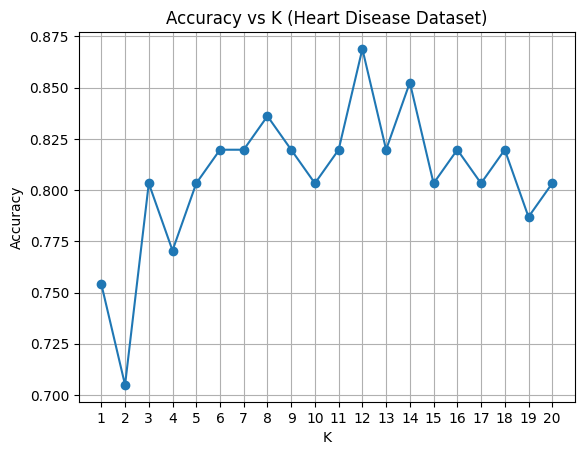

In [13]:
# Optional: Accuracy vs K plot
scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, scores, marker='o')
plt.title("Accuracy vs K (Heart Disease Dataset)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


The resulting graph shows how the model's accuracy changes with different values of K (number of neighbors).